## **Data Analysis Breakdown**

This section will cover data analysis of the previously processed dataset in order to answer the analysis objective posed in the beginning. 

The analysis will cover the following materials:

- Profitability Analysis
- Market Basket Analysis
- Geographical Analysis

## **Import modules & read dataset**

In [3]:
#Import modules
import pandas as pd
import numpy as np
import matplotlib as plt 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 
from datetime import datetime
import networkx as nx

#Read data
dfx = pd.read_csv('clean_saas.csv')

## **Profitability Analysis**

Profitability by Customer Segment

In [4]:
# Aggregate data to calculate total profit by customer segment
profit_by_segment = dfx.groupby('Segment')['Profit'].sum().reset_index()

# Sort the segments by profitability
profit_by_segment_sorted = profit_by_segment.sort_values('Profit', ascending=False)

profit_by_segment_sorted

,Segment,Profit
1,SMB,68199.293427
2,Strategic,39650.356730
0,Enterprise,24464.561192


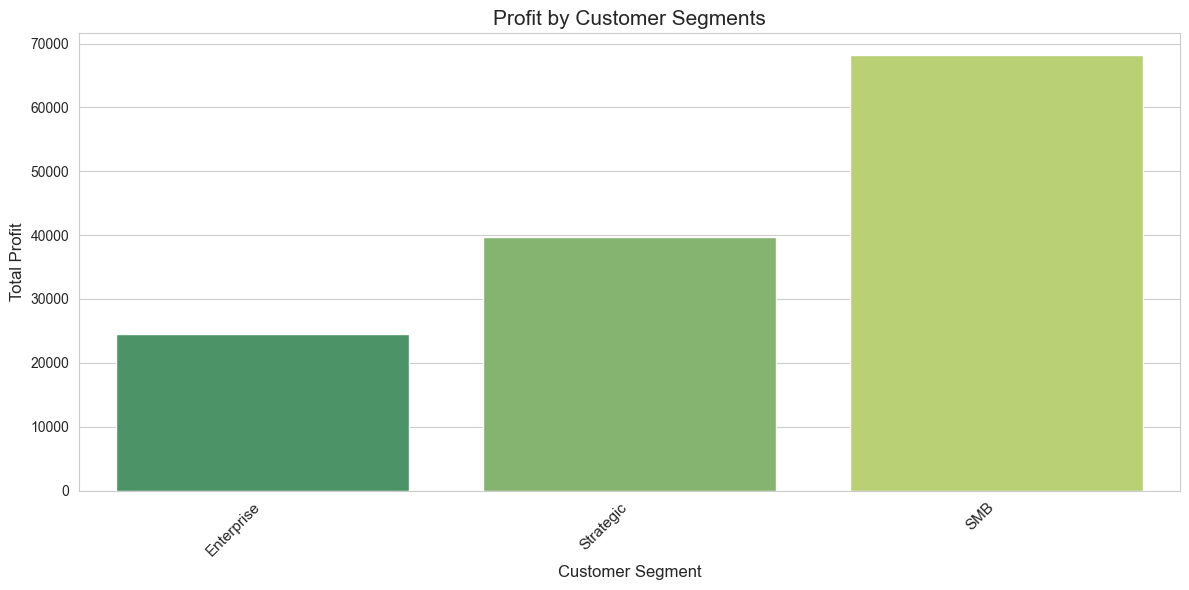

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Analysis 1: Profitability by customer segments
# We will analyze the profits by different segments and visualize the top profitable and least profitable segments.

# Grouping the data by 'Segment' and calculating the sum of 'Profit' for each group
segment_profit = dfx.groupby('Segment')['Profit'].sum().sort_values()

# Creating a bar plot for profits by segments
plt.figure(figsize=(12, 6))
segment_profit_plot = sns.barplot(x=segment_profit.index, y=segment_profit.values, palette='summer')
segment_profit_plot.set_title('Profit by Customer Segments', fontsize=15)
segment_profit_plot.set_xlabel('Customer Segment', fontsize=12)
segment_profit_plot.set_ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.tight_layout()

# Show the plots
plt.show()

The analysis of profitability by customer segment reveals the following rankings in terms of total profits:

- **SMB** (Small-Medium Businesses): This segment is the **most profitable**, with approximately $68,200 in profits.
  
- **Strategic**: Following SMBs, strategic accounts contributed around $39,650 in profits.

- **Enterprise**: This segment, typically key accounts involving large-scale businesses, generated about $24,465, making it the **least profitable** among the three.

Furthermore we will test using Kruskal-Wallis to examine if both sales and profit are affected by the different customer segment. In order to further examine the importance of the various business segments.

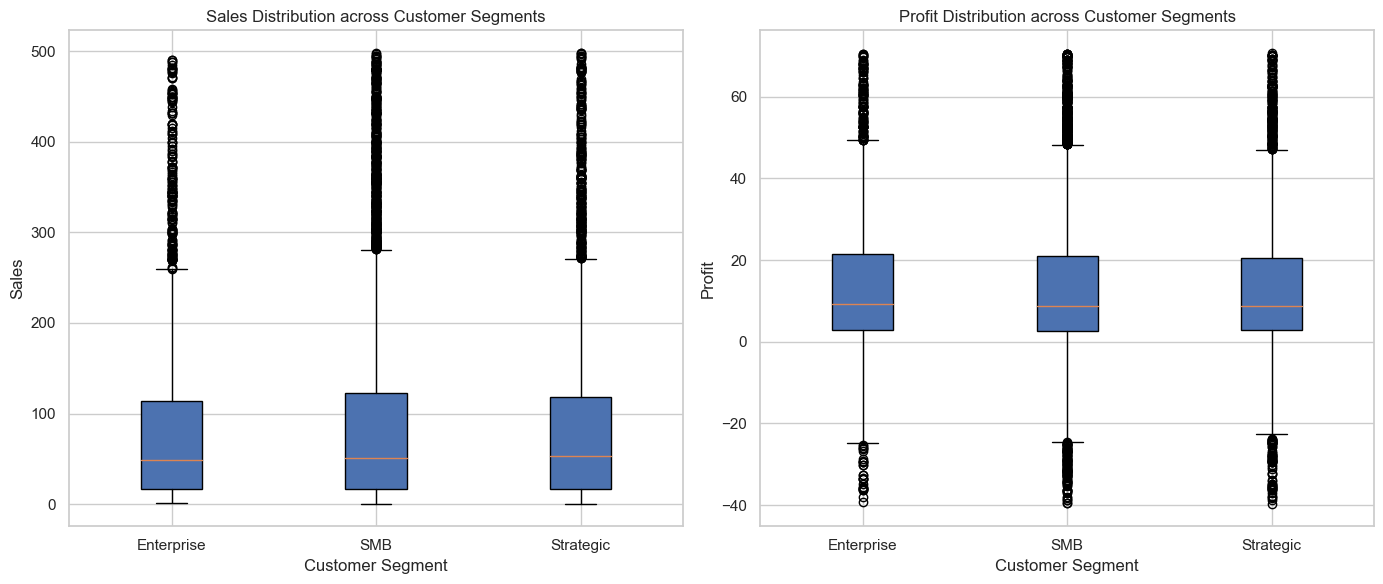

{'missing_values': {'Segment': 0, 'Sales': 0, 'Profit': 0}, 'kruskal_wallis': {'sales': {'statistic': 1.1404904553805932, 'p_value': 0.5653867732054051}, 'profit': {'statistic': 1.4418862292926433, 'p_value': 0.48629340918481345}}}


In [34]:
from scipy.stats import kruskal
import matplotlib.pyplot as plt

# Check for missing values in the 'Segment', 'Sales', and 'Profit' columns
missing_values_check = dfx[['Segment', 'Sales', 'Profit']].isnull().sum()

# If there are no missing values, we proceed with the Kruskal-Wallis test
if missing_values_check.sum() == 0:
    # Grouping the data by 'Segment'
    segments_groups = dfx.groupby('Segment')

    # Preparing the sales and profit data for each segment
    sales_data = [group['Sales'] for name, group in segments_groups]
    profit_data = [group['Profit'] for name, group in segments_groups]

    # Performing the Kruskal-Wallis test
    sales_stat, sales_p = kruskal(*sales_data)
    profit_stat, profit_p = kruskal(*profit_data)

    # Preparing a visualization to understand the distributions
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Box plot for sales
    ax[0].boxplot(sales_data, vert=True, patch_artist=True, labels=segments_groups.groups.keys())
    ax[0].set_title('Sales Distribution across Customer Segments')
    ax[0].set_xlabel('Customer Segment')
    ax[0].set_ylabel('Sales')

    # Box plot for profit
    ax[1].boxplot(profit_data, vert=True, patch_artist=True, labels=segments_groups.groups.keys())
    ax[1].set_title('Profit Distribution across Customer Segments')
    ax[1].set_xlabel('Customer Segment')
    ax[1].set_ylabel('Profit')

    plt.tight_layout()
    plt.show()

    results = {
        "missing_values": missing_values_check.to_dict(),
        "kruskal_wallis": {
            "sales": {"statistic": sales_stat, "p_value": sales_p},
            "profit": {"statistic": profit_stat, "p_value": profit_p}
        }
    }
else:
    # We will not proceed if there are missing values
    results = {"error": "Missing values present in the dataset", "missing_values": missing_values_check.to_dict()}

print(results)  # Print the results

**Kruskal-Wallis Test Results:**

- Sales across Segments:
    - Statistic: 1.1405
    - P-value: 0.5654
  
- Profit across Segments:
    - Statistic: 1.4419
    - P-value: 0.4863

**Analysis of Results:**

- Sales Distribution: The Kruskal-Wallis test resulted in a p-value of approximately 0.565 for sales across different segments. This high p-value suggests that there are no statistically significant differences in sales across the different customer segments. In simpler terms, the customer segment does not appear to influence the sales figures significantly.

- Profit Distribution: Similarly, for profit across different segments, the test provided a p-value of around 0.486. This value also exceeds common significance levels (e.g., 0.05), indicating that the differences in profit across customer segments are not statistically significant.

- The box plots visualize the distribution of sales and profit across different customer segments. From a visual standpoint, we observe overlap in the interquartile ranges across segments, further supporting the statistical results that there are no significant differences.

- The analysis suggests that within the context of this dataset, the customer segment (e.g., SMB, Strategic) does not significantly influence the amount of sales or profit. This implies that the company's offerings might have a uniform appeal across segments.

- For the business, this could mean that strategies and marketing initiatives may be designed and applied broadly across segments. However, it's also essential to consider that while the statistical test shows no difference in sales or profit, the practical significance might still be relevant. For instance, even small differences in average sales or profit across segments could translate to substantial amounts when scaled.

- Furthermore, the company might want to investigate other factors (possibly not included in this dataset) that could influence sales and profits. These factors could include marketing efforts, customer service quality, product features, competitive actions, and overall market trends.​

Impact of Discounts on Profitability

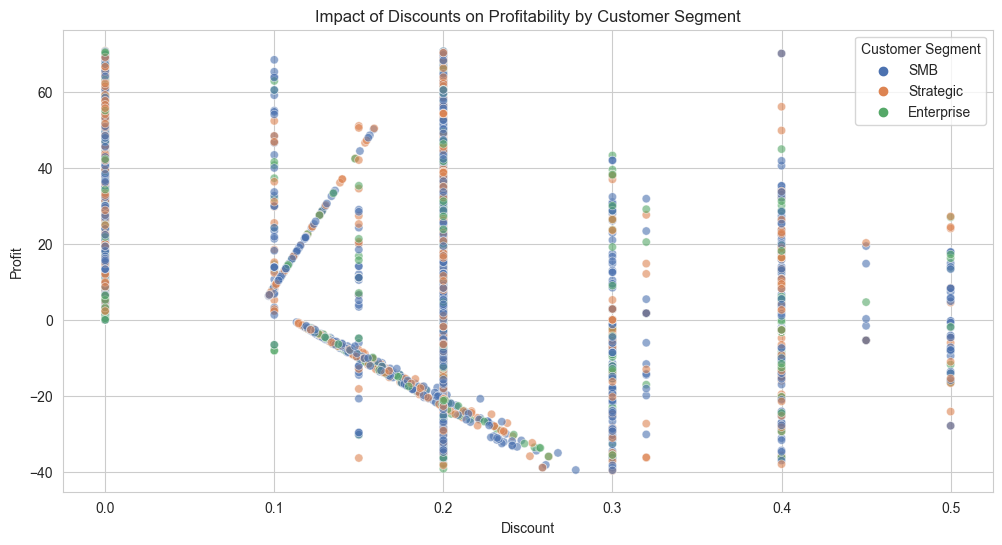

,Discount,Profit
Discount,1.000000,-0.335373
Profit,-0.335373,1.000000


In [7]:
# Creating a scatter plot to visualize the relationship between Discount and Profit
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Discount', y='Profit', hue='Segment', data=dfx, palette="deep", alpha=0.6)
plt.title('Impact of Discounts on Profitability by Customer Segment')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.legend(title='Customer Segment')
plt.grid(True)
plt.show()

# Additionally, we will calculate the correlation between Discount and Profit
correlation = dfx[['Discount', 'Profit']].corr()
correlation_discount_profit = correlation.iloc[0, 1]
correlation


The scatter plot visualizes the relationship between discounts and profits across different customer segments. Additionally, the correlation matrix indicates a negative correlation of approximately -0.34 between discounts and profits, suggesting that as discounts increase, profits tend to decrease. Here are the specific findings from this analysis:

- **Negative Correlation:** There is a moderate negative correlation between the discount given and the profit gained. This relationship suggests that higher discounts could be eroding profit margins.

- **Customer Segment Sensitivity:** From the scatter plot, all customer segments show a tendency for profits to decrease as discounts increase. However, the density and distribution of points vary across segments, indicating different sensitivities to discounting strategies. For example, the 'SMB' segment, while being the most profitable overall, appears to have a wide range of profitability even at higher discount levels, suggesting some resilience in their profit margins despite discounts.

- **Strategic Discounting:** Though discounts generally reduce profit, strategic discounting can attract or retain key customers, particularly in competitive segments. It is crucial for the company to balance the immediate impact on profit with the long-term value of customer relationships.
  
We will also further examine the correlation between discount and profit to statistically confirm their correlation and impact on AWS's business model and strategy.

In [26]:
from scipy.stats import spearmanr

# Step 1: Check for missing values in 'Discount' and 'Profit' columns
missing_values_check = dfx[['Discount', 'Profit']].isnull().sum()

# Results dictionary
spearman_results = {}

# Step 2: If there are no missing values, we proceed with Spearman's rank correlation calculation
if missing_values_check.sum() == 0:
    # Calculate the correlation between Discount and Profit
    correlation, p_value = spearmanr(dfx['Discount'], dfx['Profit'])

    # Store the results
    spearman_results = {
        "correlation": correlation,
        "p_value": p_value
    }
else:
    # We will not proceed if there are missing values
    spearman_results = {"error": "Missing values present in the dataset"}

print("\nSpearman Result")
print(spearman_results)


Spearman Result
{'correlation': -0.3518043889828415, 'p_value': 3.679018652857315e-284}


The Spearman's rank correlation coefficient between 'Discount' and 'Profit' is approximately -0.352, with a p-value close to zero (significantly less than 0.05, which is typically considered the threshold for statistical significance).

**Analysis of Results:**

- Negative Correlation: The negative coefficient indicates an inverse relationship between the discount offered and the profit gained. As the discount increases, the profit tends to decrease, and vice versa. This suggests that discounts, perhaps beyond a certain point, might erode the profit margins on the products.

- Statistical Significance: The extremely low p-value (practically 0) suggests that this negative correlation is statistically significant and not due to random chance. This lends confidence to the reliability of the observed inverse relationship between discount and profit.

- Strength of the Relationship: The correlation coefficient of -0.352 suggests a moderate negative relationship. While it confirms that the relationship exists, it also indicates that discounts are not the only factor influencing profit levels; other elements also play a role.

**Business Implications:**

- Discount Strategy Review: The analysis suggests a need to review the company's discount strategies. While discounts might be useful for driving sales volume, they appear to negatively impact profit margins. A balance is essential, ensuring that discounts attract customers and increase sales without significantly eroding profits.

- Dynamic Pricing and Promotions: The company might explore dynamic pricing strategies or tiered discount levels based on factors like order volume, customer loyalty, or package deals. This approach could help maintain customer interest while protecting profit margins.

- Cost Control and Premium Offerings: To counterbalance the effects of discounts on profits, the company could focus on controlling costs or introducing premium offerings with higher profit margins. Premium products or services, which are less sensitive to discounts, can help maintain overall profitability.

- Customer Value Proposition: Instead of competing on price alone, the company could strengthen its value proposition to customers through unique product features, superior customer service, or other value-added services. This strategy could reduce reliance on discounts as the primary sales driver.

- Market and Competitive Analysis: Understanding competitor discounting strategies and market expectations can inform the company's approach, ensuring it remains competitive without engaging in detrimental price wars.

Profitability by Product Type

In [24]:
# Aggregate data to calculate total profit by product
profit_by_product = dfx.groupby('Product')['Profit'].sum().reset_index()

# Sort the products by profitability
profit_by_product_sorted = profit_by_product.sort_values('Profit', ascending=False)

# Displaying top 10 most profitable products
top_products = profit_by_product_sorted.head(10)

# Displaying bottom 10 least profitable products
bottom_products = profit_by_product_sorted.tail(10)

print("Top 10 Most Profitable Products:")
print(top_products)

print("\nBottom 10 Least Profitable Products:")
print(bottom_products)


Top 10 Most Profitable Products:
                       Product        Profit
13                     Support  24390.203022
11              Site Analytics  17474.896549
4                 Data Smasher  16051.362457
3               ContactMatcher  13462.669732
9          SaaS Connector Pack  12106.828831
5                   FinanceHub  11353.298052
7       Marketing Suite - Gold  10487.161558
8                      OneView   9347.487578
2               ChatBot Plugin   5916.601223
10  SaaS Connector Pack - Gold   4765.509713

Bottom 10 Least Profitable Products:
                       Product        Profit
9          SaaS Connector Pack  12106.828831
5                   FinanceHub  11353.298052
7       Marketing Suite - Gold  10487.161558
8                      OneView   9347.487578
2               ChatBot Plugin   5916.601223
10  SaaS Connector Pack - Gold   4765.509713
6              Marketing Suite   2636.715283
1              Big Ol Database   2123.744831
0                      Alchem

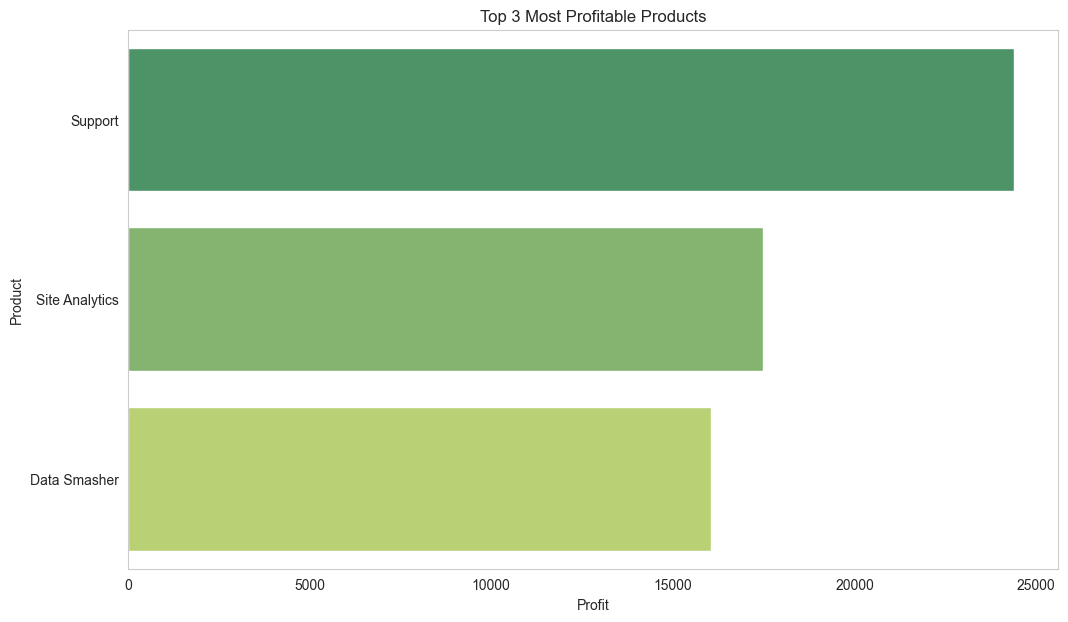

In [10]:
# Visualizing the top 3 most profitable and least profitable products

# Selecting top 3 and bottom 3 products
top_3_products = top_products.head(3)

# Concatenating the top 3 and bottom 3 for a combined visualization
selected_products = pd.concat([top_3_products])

# Creating the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Profit', y='Product', data=selected_products, palette='summer')
plt.title('Top 3 Most Profitable Products')
plt.xlabel('Profit')
plt.ylabel('Product')
plt.grid(axis='x')
plt.show()

  - Top 3 Most Profitable Products:
    - Support: This service/product leads with approximately **$24,390** in profits, suggesting **high profitability** possibly due to ongoing or high-value support contracts.
    - Site Analytics: Standing at around **$17,475**, this product could be integral to customers, given the high reliance on data analytics in business decision-making today.
    - Data Smasher: With profits of approximately **$16,051**, this product, possibly related to data management or analysis, also shows significant profitability.

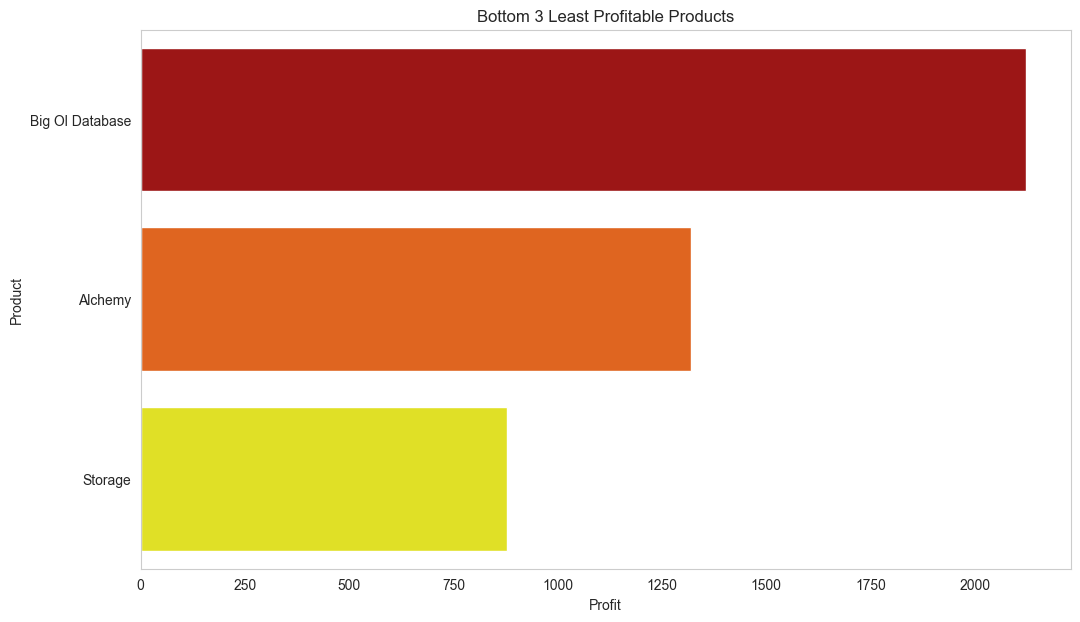

In [11]:
# Visualizing the top 3 most profitable and least profitable products

# Selecting bottom 3 products
bottom_3_products = bottom_products.tail(3)  # We're taking the tail because the list is already ascending

# Concatenating the top 3 and bottom 3 for a combined visualization
selected_products = pd.concat([bottom_3_products])

# Creating the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Profit', y='Product', data=selected_products, palette='hot')
plt.title('Bottom 3 Least Profitable Products')
plt.xlabel('Profit')
plt.ylabel('Product')
plt.grid(axis='x')
plt.show()

- Top 3 Least Profitable Products:
    - Storage: This service seems to be **the least profitable**, with profits around **$877**. Low profitability in storage could be due to high competition and commoditization in this space, leading to lower margins.
    - Alchemy: Generating around **$1,320**, this product falls at the lower end of the profitability spectrum. The specifics of the product would need to be reviewed to understand the reasons behind the low profitability.
    - Big Ol Database: This product/service has generated about **$2,124** in profits, placing it among the less profitable categories, potentially due to high operational costs or stiff market competition.

In [31]:
from scipy.stats import spearmanr

# Step 1: Check for missing values in 'Product', 'Quantity', 'Sales', and 'Profit' columns
missing_values_check = dfx[['Product', 'Quantity', 'Sales', 'Profit']].isnull().sum()

# Results dictionary
spearman_results = {}

# Step 2: If there are no missing values, we proceed with Spearman's rank correlation calculation
if missing_values_check.sum() == 0:
    # Calculate Spearman's rank correlation coefficient for each product with respect to sales and profit
    product_groups = dfx.groupby('Product')
    
    for product, group in product_groups:
        # Calculate the correlation between quantity and sales, and between quantity and profit
        correlation_sales, p_value_sales = spearmanr(group['Quantity'], group['Sales'])
        correlation_profit, p_value_profit = spearmanr(group['Quantity'], group['Profit'])
        
        # Store the results
        spearman_results[product] = {
            "sales_correlation": correlation_sales,
            "sales_p_value": p_value_sales,
            "profit_correlation": correlation_profit,
            "profit_p_value": p_value_profit
        }

    # We'll return a summary of the correlations, and the products with the highest positive and negative correlations
    # for both sales and profits (as these are of most interest).
    sales_correlations = [(product, details['sales_correlation']) for product, details in spearman_results.items()]
    profit_correlations = [(product, details['profit_correlation']) for product, details in spearman_results.items()]

    # Getting the products with highest and lowest correlation for sales and profit
    highest_sales_corr = max(sales_correlations, key=lambda x: x[1])
    lowest_sales_corr = min(sales_correlations, key=lambda x: x[1])
    highest_profit_corr = max(profit_correlations, key=lambda x: x[1])
    lowest_profit_corr = min(profit_correlations, key=lambda x: x[1])
else:
    # We will not proceed if there are missing values
    spearman_results = {"error": "Missing values present in the dataset"}

summary_results = {
    "highest_sales_correlation_product": highest_sales_corr,
    "lowest_sales_correlation_product": lowest_sales_corr,
    "highest_profit_correlation_product": highest_profit_corr,
    "lowest_profit_correlation_product": lowest_profit_corr
}

# Create a DataFrame from the summary_results dictionary
summary_df = pd.DataFrame.from_dict(summary_results, orient='index', columns=['Product', 'Correlation'])

# Display the DataFrame
print(summary_df)

                                    Product  Correlation
highest_sales_correlation_product   Storage     0.697734
lowest_sales_correlation_product    Alchemy    -0.248639
highest_profit_correlation_product  Support     0.496124
lowest_profit_correlation_product   Alchemy    -0.308077


**Key Observations:**

- Highest Correlation with Sales: 
    - The product 'Storage' has the highest positive correlation with sales (0.698), indicating that higher quantities sold are strongly associated with higher sales figures. 
    - This suggests that 'Storage' is a product that contributes significantly to sales as its quantity increases.

- Lowest Correlation with Sales: 
    - The product 'Alchemy' shows a negative correlation with sales (-0.249), suggesting that increased quantities sold do not necessarily contribute to higher sales figures. 
    - This could be due to various factors, such as lower pricing, discounts, or bundling strategies affecting the overall sales revenue for this product.

- Highest Correlation with Profit: 
    - The product 'Support' has the highest positive correlation with profit (0.496), indicating that higher quantities sold are associated with higher profit figures. 
    - This suggests that 'Support' is a product that significantly contributes to profits as its quantity increases, likely due to higher margins, lower production costs, or other factors.

- Lowest Correlation with Profit: 
  - Similarly, 'Alchemy' shows a negative correlation with profit (-0.308), which could suggest that selling more of 'Alchemy' might not be beneficial for the company's profitability, possibly due to lower margins, high production or servicing costs, or market factors like competition and demand.

**Detailed Analysis:**

- Each product's correlation with sales and profit varies, indicating diverse dynamics in how different products contribute to the company's financials. Some products may have higher sales but not necessarily contribute significantly to profits, possibly due to higher costs, lower prices, or market competition.

- The product 'Storage' stands out in its contribution to sales, suggesting it could be a flagship product or a market leader, thereby driving company revenue. On the other hand, 'Support' significantly contributes to profit, possibly indicating higher margins or efficient production/service processes.

- It's noteworthy that 'Alchemy' has a negative correlation with both sales and profit, suggesting a need for a strategic review. The company might need to consider various factors such as pricing strategy, cost management, market positioning, customer feedback, and competitive landscape for 'Alchemy' and decide whether to continue, modify, or discontinue this product line.

**Business Implications:**

- Strategic Focus on High-Performing Products: The company could allocate more resources (marketing, R&D, customer support) to products like 'Storage' and 'Support', which have a strong positive impact on sales and profits.

- Re-evaluation of Underperforming Products: 'Alchemy' may require a strategic review to understand the market dynamics affecting its performance. This could lead to a pivot in strategy, pricing adjustments, cost optimizations, or even product redesign to improve its contribution to the company's financials.

- Balanced Portfolio Management: While focusing on individual product performance, the company should also maintain a balanced portfolio to manage risk. They should consider market trends, customer preferences, and competitive actions, as over-reliance on a single product could be risky in volatile market conditions.

- Customer Insights and Feedback: Understanding why certain products perform well (or don't) could be enriched by gathering customer feedback and insights, helping to align product features, marketing strategies, and customer communication more closely with market needs.

## **Market Basket Analysis**

Frequent Itemsets

In [13]:
# Create a list of transactions where each transaction is a list of products bought together.
transactions = dfx.groupby('Order ID')['Product'].apply(list).values.tolist()

# Import the defaultdict from the collections module
from collections import defaultdict

# For the analyses, we'll use a custom implementation of frequent itemsets and association rules

# Creating a frequency dictionary for all itemsets
frequency_dict = defaultdict(int)

for transaction in transactions:
    unique_transaction = set(transaction)  # Removing duplicates within the same transaction
    if len(unique_transaction) > 1:
        for itemset in unique_transaction:
            frequency_dict[itemset] += 1  # Counting each item's occurrence

# Sorting the products based on their frequency
sorted_frequency = sorted(frequency_dict.items(), key=lambda x: x[1], reverse=True)

# Retrieving the top 5 most frequent items
top_5_items = sorted_frequency[:5]

# Retrieving the top 10 most frequent items
top_10_items = sorted_frequency[:10]

# Printing the top 5 and top 10 most frequent items
top_5_items, top_10_items

[('ContactMatcher', 991),
 ('Support', 897),
 ('Site Analytics', 605),
 ('FinanceHub', 599),
 ('SaaS Connector Pack', 594),
 ('Marketing Suite - Gold', 551),
 ('Data Smasher', 503),
 ('ChatBot Plugin', 477),
 ('OneView', 336),
 ('SaaS Connector Pack - Gold', 179)]

Here are the top products:

- 'ContactMatcher': This item appears most frequently, with 991 occurrences in transactions. Its prevalence suggests it's a popular or essential product for customers.

- 'Support': This service is the second most common, with 897 instances, indicating that customers often require support for their purchases, possibly due to the technical nature of the products.

- 'Site Analytics': Appearing 605 times, this product's popularity might be driven by the increasing demand for data analytics in business operations.

Association Rules

In [14]:
# Creating pairs of products in each transaction and calculating their co-occurrence
pair_counts = defaultdict(int)

# For each transaction, create pairs of items and add them to the list
for transaction in transactions:
    unique_transaction = list(set(transaction))  # Remove duplicates within the same transaction
    if len(unique_transaction) > 1:
        for i in range(len(unique_transaction)):
            for j in range(i+1, len(unique_transaction)):
                # Sort the pair to avoid reversed duplicates
                pair = tuple(sorted([unique_transaction[i], unique_transaction[j]]))
                pair_counts[pair] += 1

# Convert the dictionary to a list of tuples and sort them by frequency
sorted_pairs = sorted(pair_counts.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 most common pairs
top_10_pairs = sorted_pairs[:10]

# For the association rules, we are interested in pairs where the presence of one item significantly increases the chance of the other being purchased.
# We calculate this as a simple conditional probability for now.

# Dictionary to store the association rules and their strength (conditional probability)
association_rules = {}

for pair, frequency in top_10_pairs:
    # The strength of the rule [X -> Y] is estimated by P(Y | X) = P(X, Y) / P(X)
    prob_x = frequency_dict[pair[0]] / len(transactions)  # P(X)
    prob_xy = frequency / len(transactions)  # P(X, Y)
    conditional_prob = prob_xy / prob_x  # P(Y | X)
    
    # We store the rule and its strength
    association_rules[pair] = conditional_prob

# Sorting the association rules by their strength
sorted_rules = sorted(association_rules.items(), key=lambda x: x[1], reverse=True)

# Retrieve the top 5 rules
top_5_rules = sorted_rules[:5]

top_5_rules

[(('FinanceHub', 'Support'), 0.3589315525876461),
 (('Marketing Suite - Gold', 'Support'), 0.35753176043557167),
 (('ContactMatcher', 'Support'), 0.3481331987891019),
 (('SaaS Connector Pack', 'Support'), 0.3232323232323232),
 (('Site Analytics', 'Support'), 0.30247933884297523)]

In [35]:
# Creating pairs of products in each transaction and calculating their co-occurrence
pair_counts = defaultdict(int)

# For each transaction, create pairs of items and add them to the list
for transaction in transactions:
    unique_transaction = list(set(transaction))  # Remove duplicates within the same transaction
    if len(unique_transaction) > 1:
        for i in range(len(unique_transaction)):
            for j in range(i+1, len(unique_transaction)):
                # Sort the pair to avoid reversed duplicates
                pair = tuple(sorted([unique_transaction[i], unique_transaction[j]]))
                pair_counts[pair] += 1

# Convert the dictionary to a list of tuples and sort them by frequency
sorted_pairs = sorted(pair_counts.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 most common pairs
top_10_pairs = sorted_pairs[:10]

# For the association rules, we are interested in pairs where the presence of one item significantly increases the chance of the other being purchased.
# We calculate this as a simple conditional probability for now.

# Dictionary to store the association rules and their strength (conditional probability)
association_rules = {}

for pair, frequency in top_10_pairs:
    # The strength of the rule [X -> Y] is estimated by P(Y | X) = P(X, Y) / P(X)
    prob_x = frequency_dict[pair[0]] / len(transactions)  # P(X)
    prob_xy = frequency / len(transactions)  # P(X, Y)
    conditional_prob = prob_xy / prob_x  # P(Y | X)
    
    # We store the rule and its strength
    association_rules[pair] = conditional_prob

# Sorting the association rules by their strength
sorted_rules = sorted(association_rules.items(), key=lambda x: x[1], reverse=True)

# Retrieve the top 5 rules
top_10_rules = sorted_rules[:10]

top_10_rules

[(('FinanceHub', 'Support'), 0.3589315525876461),
 (('Marketing Suite - Gold', 'Support'), 0.35753176043557167),
 (('ContactMatcher', 'Support'), 0.3481331987891019),
 (('SaaS Connector Pack', 'Support'), 0.3232323232323232),
 (('Site Analytics', 'Support'), 0.30247933884297523),
 (('ContactMatcher', 'Site Analytics'), 0.2270433905146317),
 (('ContactMatcher', 'Marketing Suite - Gold'), 0.2260343087790111),
 (('ContactMatcher', 'SaaS Connector Pack'), 0.21695257315842584),
 (('ContactMatcher', 'FinanceHub'), 0.21190716448032293),
 (('ContactMatcher', 'Data Smasher'), 0.18062563067608475)]

- 'FinanceHub' and 'Support': The conditional probability of customers purchasing 'Support' given they've purchased 'FinanceHub' is approximately 0.359. This strong association suggests that 'FinanceHub' users often need 'Support', possibly due to the product's complexity or crucial role in operations.

- 'Marketing Suite - Gold' and 'Support': Similarly, customers who invest in 'Marketing Suite - Gold' also require 'Support' with a probability of around 0.358. This insight indicates that comprehensive marketing solutions might be complex and necessitate professional assistance.

- 'ContactMatcher' and 'Support': There's a 0.348 probability that customers will seek 'Support' when they purchase 'ContactMatcher'. This pattern again highlights the potential technical complexities or essential operational role of 'ContactMatcher'.

These rules are particularly valuable for developing strategies such as effective cross-selling and incentivized bundling. Knowing that customers who purchase 'FinanceHub' are highly likely to need 'Support' allows for targeted bundling of these products, perhaps at a discounted rate, to encourage higher overall spending.

Network Analysis of Products

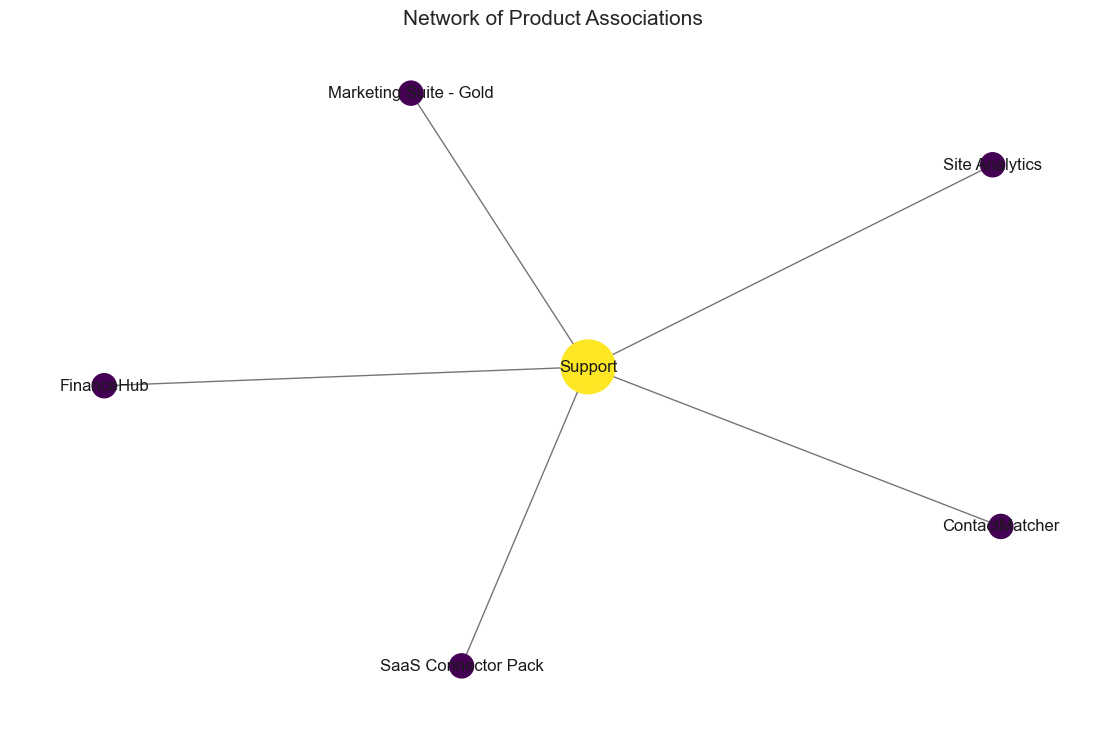

In [38]:
# Create a network graph from the pairs
G = nx.Graph()
for pair, strength in top_5_rules:
    # Use the strength of the rule as weight (importance) of the edge
    G.add_edge(pair[0], pair[1], weight=strength)

# Size of nodes will be based on the degree (number of connections)
degrees = [val for (node, val) in G.degree()]

# Colors of nodes based on the degree
colors = [G.degree(node) for node in G.nodes()]

# Create the visualization
plt.figure(figsize=(14, 9))
pos = nx.spring_layout(G, seed=27)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=[val * 300 for val in degrees], node_color=colors, cmap='viridis')

# edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.6)

# labels
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

plt.title('Network of Product Associations', size=15)
plt.axis('off') 
plt.show()

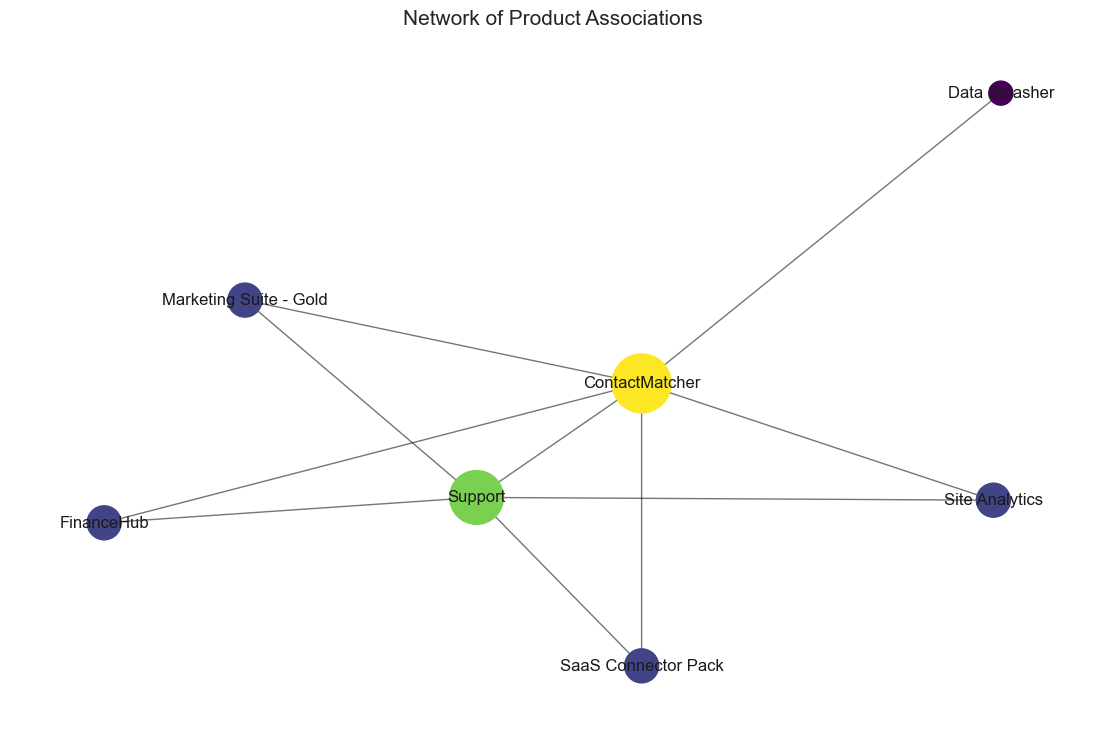

In [39]:
# Create a network graph from the pairs
G = nx.Graph()
for pair, strength in top_10_rules:
    # Use the strength of the rule as weight (importance) of the edge
    G.add_edge(pair[0], pair[1], weight=strength)

# Size of nodes will be based on the degree (number of connections)
degrees = [val for (node, val) in G.degree()]

# Colors of nodes based on the degree
colors = [G.degree(node) for node in G.nodes()]

# Create the visualization
plt.figure(figsize=(14, 9))
pos = nx.spring_layout(G, seed=27)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=[val * 300 for val in degrees], node_color=colors, cmap='viridis')

# edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.6)

# labels
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

plt.title('Network of Product Associations', size=15)
plt.axis('off')  
plt.show()

The network graph illustrates the relationships between products, emphasizing the probability of one product being purchased when another has been selected. 

In this visual:
- Nodes represent products.
- Edges (lines) between nodes indicate a significant association between product purchases.

The node size reflects the number of connections (degree), highlighting products that commonly co-occur in purchases.

## **Geographical Analysis**

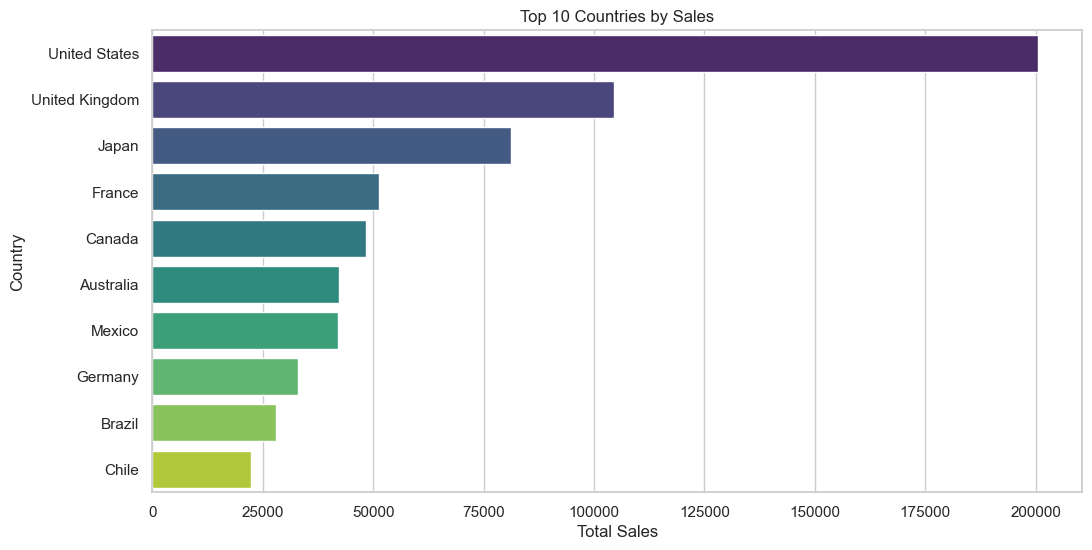

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Analysis of sales by country
sales_by_country = dfx.groupby("Country")["Sales"].sum().sort_values(ascending=False)

# Plot the top 10 countries by sales for a clearer visualization
top_countries = sales_by_country.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.title('Top 10 Countries by Sales')
plt.show()

- Top 10 Countries by Sales: 
  - The first bar chart displays the countries contributing the highest sales. Firms can use this information for strategic expansion, focusing efforts and resources on countries that are already generating significant revenue. However, there's also a need to consider countries not on the list, as they might represent untapped markets with potential for growth.

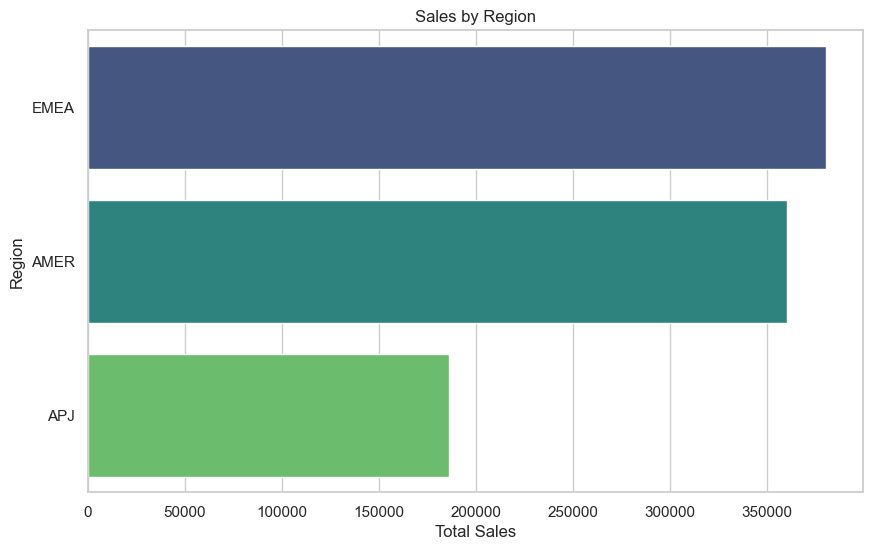

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style of seaborn for better visualization
sns.set(style="whitegrid")

# Analysis of sales by country
sales_by_country = dfx.groupby("Country")["Sales"].sum().sort_values(ascending=False)

# Analysis of sales by region
sales_by_region = dfx.groupby("Region")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_region.values, y=sales_by_region.index, palette='viridis')
plt.xlabel('Total Sales')
plt.ylabel('Region')
plt.title('Sales by Region')
plt.show()


- Sales by Region: 
  - The second chart breaks down sales by region, offering a broader view of market performance. This macro perspective is crucial for logistical efficiency, as understanding regional sales performance allows for the optimization of supply chains, warehouses, and distribution networks in high-performing regions.

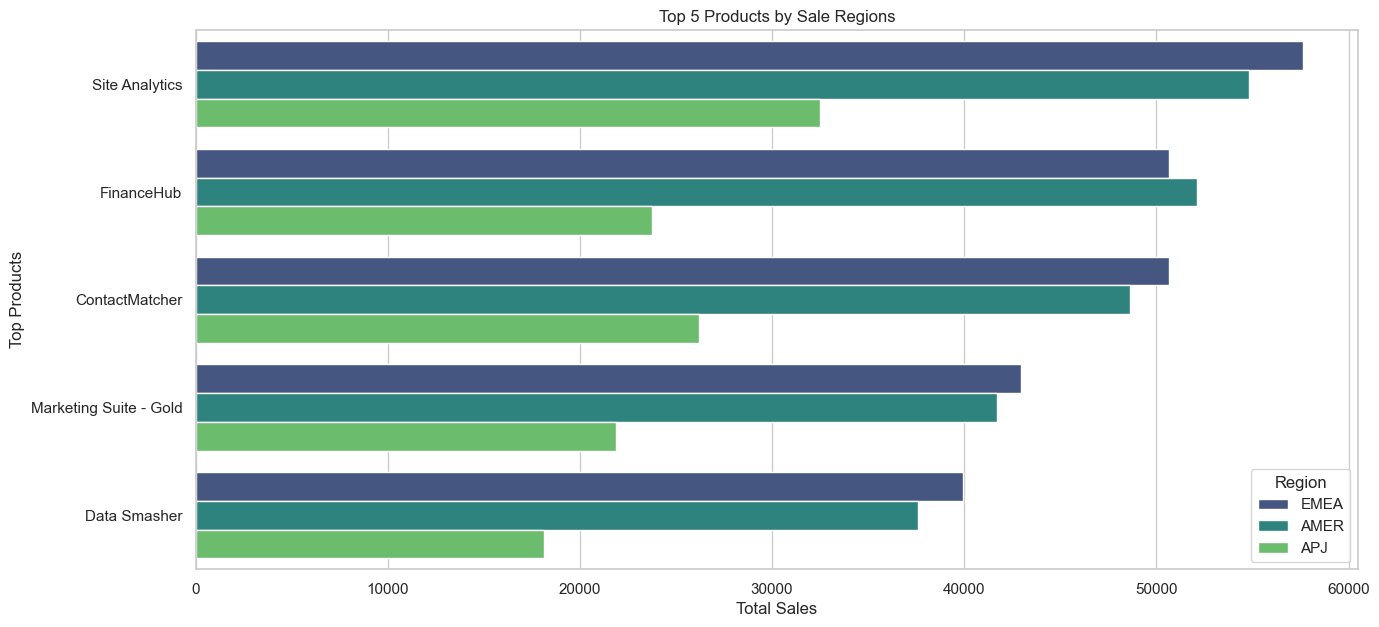

In [18]:
# Analyzing the top products per region
top_products_region = dfx.groupby(["Region", "Product"])["Sales"].sum().reset_index()

# Getting the top 5 products for each region based on sales
top_products = top_products_region.sort_values('Sales', ascending=False).groupby('Region').head(5)

# Creating a visualization
plt.figure(figsize=(15, 7))
sns.barplot(x="Sales", y="Product", hue="Region", data=top_products, palette='viridis')
plt.xlabel('Total Sales')
plt.ylabel('Top Products')
plt.title('Top 5 Products by Sale Regions')
plt.legend(title='Region')
plt.show()


The visualization above showcases the top three products by sales in each region, offering several strategic insights:

- Cultural Resonance: 
  - By identifying the products that resonate most within each region, companies can tailor their marketing strategies and product recommendations to match local preferences. 
  - This customization can increase customer engagement and satisfaction, potentially boosting sales.

- Localized Sales Approaches: 
  - Understanding the top-selling products in different regions enables the adaptation of sales pitches and strategies to emphasize products that are more likely to appeal to regional customers. 
  - This approach includes highlighting product features valued by local markets or offering bundles that are region-specific.

- Competitive Foresight: 
  - By recognizing products that are popular across multiple regions, companies can anticipate and prepare for competitive moves, such as similar products being introduced by rivals. 
  - Conversely, identifying unique bestsellers in specific regions could indicate a niche market advantage.

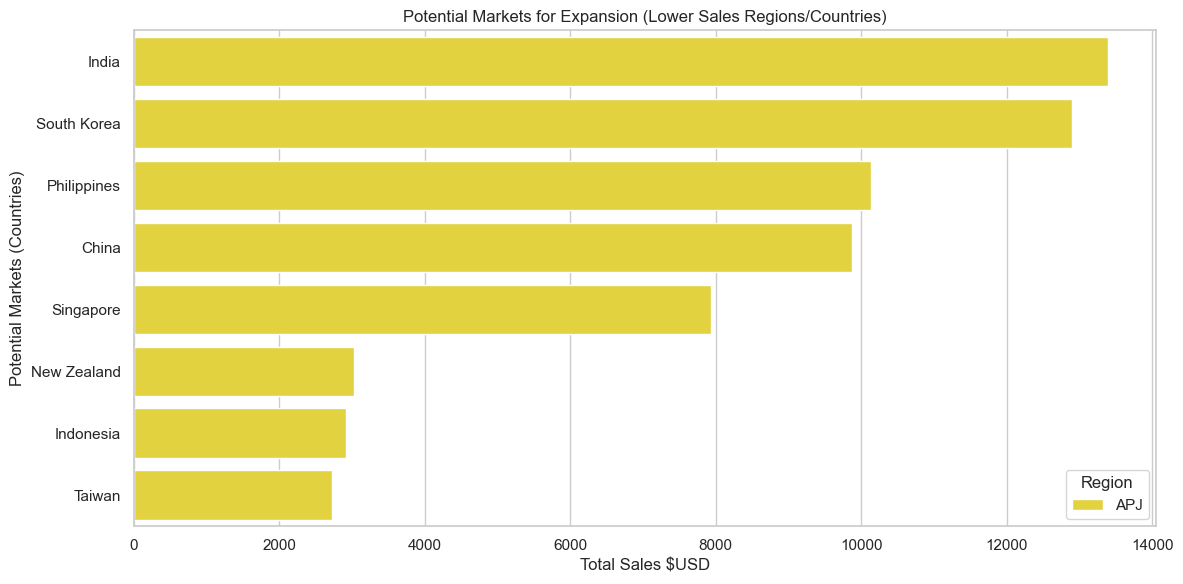

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Identify regions with lower sales which could be potential markets for expansion.
lower_sales_regions = sales_by_region[sales_by_region <= sales_by_region.mean()]

# For a detailed view, we'll also look at countries within these regions with sales below the regional average.
potential_countries = dfx.groupby(["Region", "Country"])["Sales"].sum().reset_index()
potential_countries = potential_countries[potential_countries['Region'].isin(lower_sales_regions.index)]

# Filter out countries in these regions with sales above the regional average, as we're interested in untapped/low-sales markets.
potential_countries = potential_countries[potential_countries['Sales'] <= potential_countries.groupby('Region')['Sales'].transform('mean')]

# Sort countries within each region by sales in descending order
potential_countries = potential_countries.sort_values(by=['Region', 'Sales'], ascending=[True, False])

# Define a colormap for the gradient effect
colormap = plt.get_cmap('viridis')

# Visualizing these potential markets in
plt.figure(figsize=(12, 6))
sns.barplot(x="Sales", y="Country", hue="Region", data=potential_countries, palette=colormap(potential_countries['Sales']))
plt.xlabel('Total Sales $USD')
plt.ylabel('Potential Markets (Countries)')
plt.title('Potential Markets for Expansion (Lower Sales Regions/Countries)')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

The visualization highlights potential markets for strategic expansion, specifically focusing on countries within regions that have lower overall sales. These areas may represent untapped markets where there could be opportunities for growth. 

## **Recommendation**

### **Profitability Analysis**

- Enhanced Targeting:
  - The most profitable segment is the 'SMB' (Small and Medium-sized Businesses) segment, with significant profit margins. Targeted marketing efforts and premium offerings could be specially designed for this segment to enhance revenues.

- Resource Efficiency:
  - Given that the 'SMB' segment leads profitability, redirecting additional resources, such as personalized customer success initiatives and customized product bundles, can optimize expenditures and boost profit margins.

- Strategic Pricing:
  - The 'Strategic' segment, while not the most profitable, has the highest average discounts. This suggests a space to evaluate the impact of discount strategies on profit margins. Balancing discount rates with volume commitments or bundled offerings might improve overall profitability in this segment.

- Product Evolution:
  - The products generating the most profit are 'Support', 'Site Analytics', and 'Data Smasher'. Tailoring innovations and enhancements to these products, based on profitable customer feedback and preferences, could drive increased market demand and customer satisfaction.

- Risk Diversification:
  - While the 'SMB' segment is currently the most profitable, focusing solely on this area may pose a business risk. Diversification into the 'Strategic' and 'Enterprise' segments, potentially by adjusting offerings, pricing strategies, or customer engagement, could spread risk and open new revenue channels.

### **Market Basket Analysis**

- Effective Cross-Selling:
  - The prevalence of single-product orders indicates an opportunity for cross-selling. By identifying products that complement 'ContactMatcher', 'Support', or 'FinanceHub', the company can suggest these add-ons at the point of sale or through follow-up marketing efforts.

- Inventory Precision:
  - Given the high frequency of specific product orders, it's crucial to maintain optimal inventory levels for 'ContactMatcher', 'Support', and 'FinanceHub' to meet demand efficiently.

- Incentivized Bundling:
  - Creating incentivized packages combining top-selling products with relevant add-ons could encourage customers to purchase more comprehensive solutions. For instance, bundling 'Support' services with 'ContactMatcher' software may resonate with customer needs.

- Targeted Marketing:
  - Marketing campaigns can be tailored to highlight the benefits of integrating multiple software solutions. Sharing success stories or use cases where customers have leveraged product combinations effectively could inspire increased basket sizes.

- Personalized Shopping:
  - Implementing a recommendation system that suggests products based on a customer's purchase history could facilitate personalized shopping experiences. If a customer purchases 'FinanceHub', the system might recommend 'Support' or other complementary solutions.

### **Geographical Sales Analysis**
- Strategic Expansion:
  - While EMEA and AMER are strong markets, APJ represents a potential growth area. Expansion strategies could focus on understanding the APJ market's unique needs and untapped opportunities, perhaps starting with market research or pilot marketing campaigns.

- Cultural Resonance:
  - Tailoring marketing and product offerings to local cultural preferences can significantly increase engagement. For instance, in EMEA, where sales are high, identifying and aligning with regional trends or preferences could further solidify market presence. In the APJ region, understanding local business culture, customer preferences, and market needs can help tailor strategies for greater resonance.

- Logistical Efficiency:
  - Supply chain optimizations should consider these geographical insights. For regions with high sales, like EMEA and AMER, ensuring efficient logistics and technical support can help maintain customer satisfaction

- Localized Sales Approaches:
  - Sales tactics and campaigns need to reflect regional nuances. In the APJ region, for instance, strategies could focus on building relationships through local partnerships, participating in regional events, or employing sales representatives familiar with the local business landscape.

- Competitive Foresight:
  - The lesser concentration in APJ suggests potential for a first-mover advantage in certain market segments within this region. By identifying niches or areas underserved by competitors, the company could establish a strong presence by being one of the first to offer tailored solutions.

In conclusion, these analyses provide a roadmap for targeted strategies across customer segments, product offerings, and regional markets. Implementing these insights could lead to increased profitability, more effective resource allocation, and stronger market positioning. Regularly revisiting this data-driven approach will be essential as market conditions evolve.​